# Pymaceuticals Inc.
---

### Analysis

- Add your analysis here.
 

# Prepare The Data

In [37]:
# Dependencies and Setup
import pathlib as path
import matplotlib.pyplot as plt
import pandas as pd
import scipy.stats as st
import numpy as np

# Study data files
mouse_metadata_path = "data/Mouse_metadata.csv"
study_results_path = "data/Study_results.csv"

# Read the mouse data and the study results
mouse_metadata = pd.read_csv(mouse_metadata_path)
study_results = pd.read_csv(study_results_path)




In [38]:
#list column names
print(mouse_metadata.columns)
print(study_results.columns)

Index(['Mouse ID', 'Drug Regimen', 'Sex', 'Age_months', 'Weight (g)'], dtype='object')
Index(['Mouse ID', 'Timepoint', 'Tumor Volume (mm3)', 'Metastatic Sites'], dtype='object')


In [39]:
# Combine the data into a single DataFrame
combined_df = pd.merge(mouse_metadata, study_results, on='Mouse ID', how='inner')

# Display the data table for preview
print(combined_df)

     Mouse ID Drug Regimen   Sex  Age_months  Weight (g)  Timepoint  \
0        k403     Ramicane  Male          21          16          0   
1        k403     Ramicane  Male          21          16          5   
2        k403     Ramicane  Male          21          16         10   
3        k403     Ramicane  Male          21          16         15   
4        k403     Ramicane  Male          21          16         20   
...       ...          ...   ...         ...         ...        ...   
1888     z969     Naftisol  Male           9          30         25   
1889     z969     Naftisol  Male           9          30         30   
1890     z969     Naftisol  Male           9          30         35   
1891     z969     Naftisol  Male           9          30         40   
1892     z969     Naftisol  Male           9          30         45   

      Tumor Volume (mm3)  Metastatic Sites  
0              45.000000                 0  
1              38.825898                 0  
2           

In [40]:
# Display the number of unique 'Mouse ID's
unique_mouse_ids = combined_df['Mouse ID'].nunique()
print(f"Number of unique Mouse IDs: {unique_mouse_ids}")

Number of unique Mouse IDs: 249


In [41]:
# Check for any 'Mouse ID' with duplicate time points
duplicate_timepoints = combined_df[combined_df.duplicated(subset=['Mouse ID', 'Timepoint'], keep=False)]

if not duplicate_timepoints.empty:
    print("Mouse IDs with duplicate time points:")
    print(duplicate_timepoints)

Mouse IDs with duplicate time points:
    Mouse ID Drug Regimen     Sex  Age_months  Weight (g)  Timepoint  \
908     g989     Propriva  Female          21          26          0   
909     g989     Propriva  Female          21          26          0   
910     g989     Propriva  Female          21          26          5   
911     g989     Propriva  Female          21          26          5   
912     g989     Propriva  Female          21          26         10   
913     g989     Propriva  Female          21          26         10   
914     g989     Propriva  Female          21          26         15   
915     g989     Propriva  Female          21          26         15   
916     g989     Propriva  Female          21          26         20   
917     g989     Propriva  Female          21          26         20   

     Tumor Volume (mm3)  Metastatic Sites  
908           45.000000                 0  
909           45.000000                 0  
910           48.786801              

In [42]:
# remove duplicate data

if not duplicate_timepoints.empty:
    mice_with_duplicates = duplicate_timepoints['Mouse ID'].unique()
    cleaned_df = combined_df[~combined_df['Mouse ID'].isin(mice_with_duplicates)]
else:
    cleaned_df = combined_df

In [43]:
# Display the updated number of unique 'Mouse ID's
updated_unique_mouse_ids = cleaned_df['Mouse ID'].nunique()
print(f"Updated number of unique Mouse IDs: {updated_unique_mouse_ids}")

Updated number of unique Mouse IDs: 248


In [44]:
cleaned_df.head()

,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites
0,k403,Ramicane,Male,21,16,0,45.000000,0
1,k403,Ramicane,Male,21,16,5,38.825898,0
2,k403,Ramicane,Male,21,16,10,35.014271,1
3,k403,Ramicane,Male,21,16,15,34.223992,1
4,k403,Ramicane,Male,21,16,20,32.997729,1


In [45]:
print(cleaned_df.columns)

Index(['Mouse ID', 'Drug Regimen', 'Sex', 'Age_months', 'Weight (g)',
       'Timepoint', 'Tumor Volume (mm3)', 'Metastatic Sites'],
      dtype='object')


# Generate Summary Stastics 

In [46]:
# Group the data by 'Drug Regimen'
grouped_df = cleaned_df.groupby('Drug Regimen')['Tumor Volume (mm3)']

In [47]:
# Calculate the statistics
mean_tumor_vol = grouped_df.mean()
median_tumor_vol = grouped_df.median()
var_tumor_vol = grouped_df.var()
std_tumor_vol = grouped_df.std()
sem_tumor_vol = grouped_df.sem()

In [48]:
# Combine the statistics into a summary DataFrame
summary_df = pd.DataFrame({
    'Mean Tumor Volume': mean_tumor_vol,
    'Median Tumor Volume': median_tumor_vol,
    'Tumor VolumeVariance': var_tumor_vol,
    'Tumor VolumeStandard Deviation': std_tumor_vol,
    'Tumor Volume SEM': sem_tumor_vol
})

# Display the summary DataFrame
summary_df

,Mean Tumor Volume,Median Tumor Volume,Tumor VolumeVariance,Tumor VolumeStandard Deviation,Tumor Volume SEM
Drug Regimen,,,,,
Capomulin,40.675741,41.557809,24.947764,4.994774,0.329346
Ceftamin,52.591172,51.776157,39.290177,6.268188,0.469821
Infubinol,52.884795,51.820584,43.128684,6.567243,0.492236
Ketapril,55.235638,53.698743,68.553577,8.279709,0.603860
Naftisol,54.331565,52.509285,66.173479,8.134708,0.596466
Placebo,54.033581,52.288934,61.168083,7.821003,0.581331
Propriva,52.320930,50.446266,43.852013,6.622085,0.544332
Ramicane,40.216745,40.673236,23.486704,4.846308,0.320955
Stelasyn,54.233149,52.431737,59.450562,7.710419,0.573111


# Create Bar Charts and Pie Charts

In [49]:
# Count the number of rows for each drug regimen
regimen_counts = cleaned_df['Drug Regimen'].value_counts()

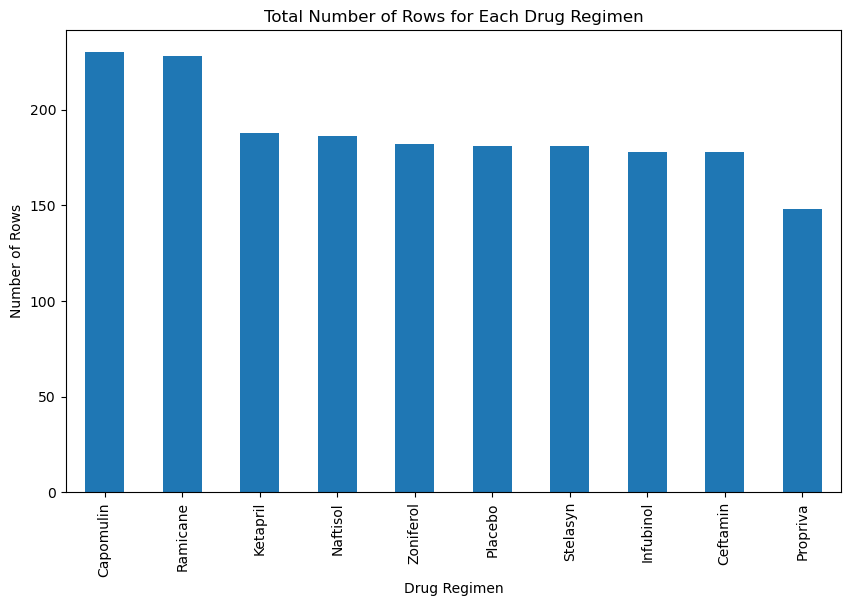

In [50]:
# Create the bar chart using Pandas DataFrame.plot()
ax = regimen_counts.plot(kind='bar', figsize=(10, 6), title='Total Number of Rows for Each Drug Regimen')
ax.set_xlabel('Drug Regimen')
ax.set_ylabel('Number of Rows')
plt.show()

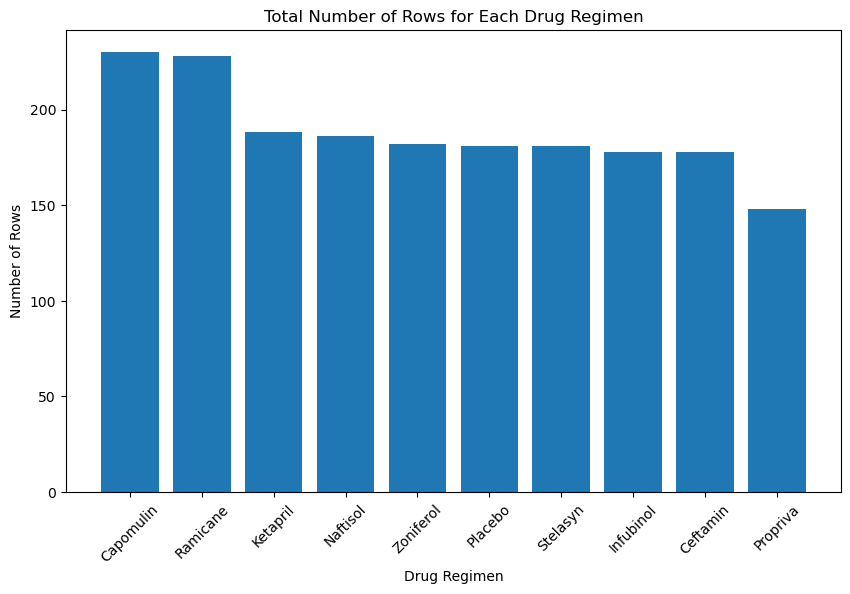

In [51]:
# Create bar chart using Matplotlib
plt.figure(figsize=(10, 6))
plt.bar(regimen_counts.index, regimen_counts.values)
plt.title('Total Number of Rows for Each Drug Regimen')
plt.xlabel('Drug Regimen')
plt.ylabel('Number of Rows')
plt.xticks(rotation=45)
plt.show()

# Create Pie Charts

In [52]:
# Count the number of female and male mice
sex_counts = cleaned_df['Sex'].value_counts()

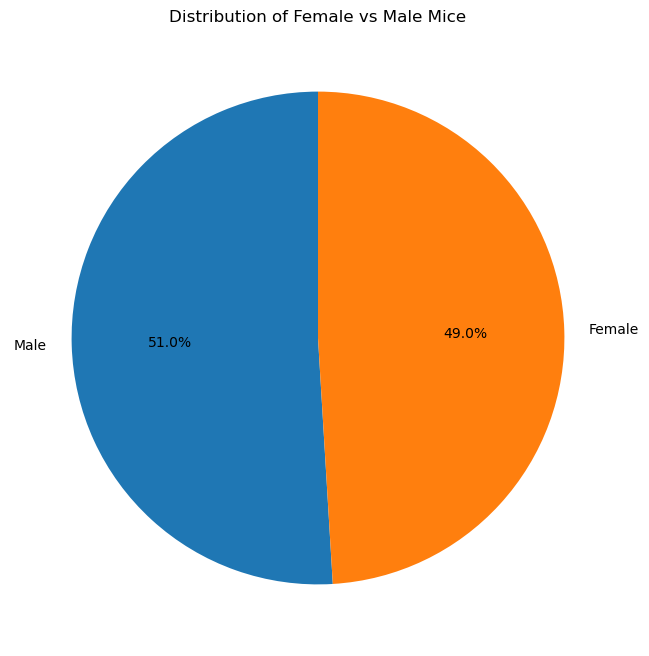

In [53]:
# Create pie chart using Pandas DataFrame.plot()
sex_counts.plot(kind='pie', autopct='%1.1f%%', startangle=90, figsize=(8, 8), title='Distribution of Female vs Male Mice')
plt.ylabel('')  # Remove the default 'Sex' label
plt.show()

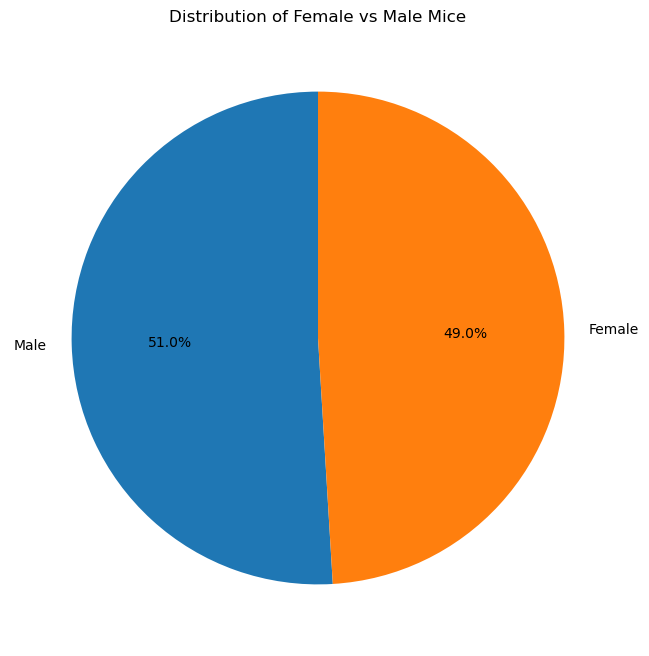

In [54]:
# Create pie chart using Matplotlib
plt.figure(figsize=(8, 8))
plt.pie(sex_counts, labels=sex_counts.index, autopct='%1.1f%%', startangle=90)
plt.title('Distribution of Female vs Male Mice')
plt.show()

# Calculate Quartiles, Find Outliers, and Create a Box Plot

In [55]:
# Get the last timepoint for each mouse
last_timepoints = cleaned_df.groupby('Mouse ID')['Timepoint'].max().reset_index()



In [56]:
# Merge with the original DataFrame to get the tumor volume at the last timepoint
merged_df = pd.merge(last_timepoints, cleaned_df, on=['Mouse ID', 'Timepoint'], how='left')

In [57]:

# Define Treatment Regimens 
treatment_regimens = ['Capomulin', 'Ramicane', 'Infubinol', 'Ceftamin']

# Filter for specified treatment regimens
filtered_df = merged_df[merged_df['Drug Regimen'].isin(treatment_regimens)]



In [58]:
#Extract the final tumor volume for each mouse under specified treatment regimens
final_tumor_volumes = filtered_df[['Mouse ID', 'Drug Regimen', 'Tumor Volume (mm3)']]

In [59]:
print(final_tumor_volumes)

    Mouse ID Drug Regimen  Tumor Volume (mm3)
0       a203    Infubinol           67.973419
1       a251    Infubinol           65.525743
3       a275     Ceftamin           62.999356
6       a411     Ramicane           38.407618
7       a444     Ramicane           43.047543
..       ...          ...                 ...
238     y769     Ceftamin           68.594745
239     y793    Capomulin           31.896238
240     y865     Ceftamin           64.729837
244     z578     Ramicane           30.638696
245     z581    Infubinol           62.754451

[100 rows x 3 columns]


In [60]:
# List for for loop and plot labels
treatments = ['Capomulin', 'Ramicane', 'Infubinol', 'Ceftamin']

In [61]:
# Create empty list to fill with tumor vol data (for plotting)
tumor_volume_data = []

# Loop through each treatment
for treatment in treatments:
    # Filter DataFrame for mice treated with the current treatment
    treatment_data = filtered_df[filtered_df['Drug Regimen'] == treatment]['Tumor Volume (mm3)']
    
    # Append tumor volume data for the current treatment to the list
    tumor_volume_data.append(treatment_data)
    
    # Calculate the quartiles and IQR for the current treatment
    quartiles = treatment_data.quantile([0.25, 0.5, 0.75])
    lower_quartile = quartiles[0.25]
    upper_quartile = quartiles[0.75]
    iqr = upper_quartile - lower_quartile
    
    # Determine outliers using upper and lower bounds
    lower_bound = lower_quartile - (1.5 * iqr)
    upper_bound = upper_quartile + (1.5 * iqr)
    
    # Find potential outliers
    potential_outliers = treatment_data[(treatment_data < lower_bound) | (treatment_data > upper_bound)]
    
    # Print results
    print(f"Results for {treatment}:")
    print(f"    Q1: {lower_quartile}")
    print(f"    Q3: {upper_quartile}")
    print(f"    IQR: {iqr}")
    print(f"    Potential Outliers: {potential_outliers.values}")
    print("\n")


Results for Capomulin:
    Q1: 32.37735684
    Q3: 40.1592203
    IQR: 7.781863460000004
    Potential Outliers: []


Results for Ramicane:
    Q1: 31.56046955
    Q3: 40.65900627
    IQR: 9.098536719999998
    Potential Outliers: []


Results for Infubinol:
    Q1: 54.04860769
    Q3: 65.52574285
    IQR: 11.477135160000003
    Potential Outliers: [36.3213458]


Results for Ceftamin:
    Q1: 48.72207785
    Q3: 64.29983003
    IQR: 15.577752179999997
    Potential Outliers: []




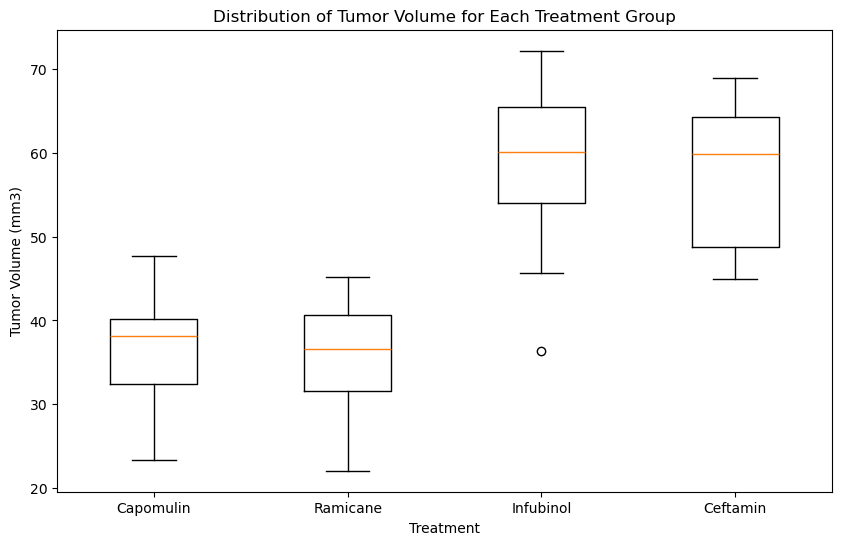

In [62]:
# Generate a box plot that shows the distrubution of the tumor volume for each treatment group.

plt.figure(figsize=(10, 6))
plt.boxplot(tumor_volume_data, labels=treatments)
plt.title('Distribution of Tumor Volume for Each Treatment Group')
plt.xlabel('Treatment')
plt.ylabel('Tumor Volume (mm3)')
plt.show()

# Line and Scatter Plots

In [63]:
# Generate a line plot of tumor volume vs. time point for a single mouse treated with Capomulin

# Choose DF for single mouse
capomulin_df = cleaned_df[cleaned_df['Drug Regimen'] == 'Capomulin']


capomulin_df

,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites
10,s185,Capomulin,Female,3,17,0,45.000000,0
11,s185,Capomulin,Female,3,17,5,43.878496,0
12,s185,Capomulin,Female,3,17,10,37.614948,0
13,s185,Capomulin,Female,3,17,15,38.177232,0
14,s185,Capomulin,Female,3,17,20,36.866876,0
...,...,...,...,...,...,...,...,...
440,i557,Capomulin,Female,1,24,45,47.685963,1
1452,r157,Capomulin,Male,22,25,0,45.000000,0
1453,r157,Capomulin,Male,22,25,5,45.597064,0
1454,r157,Capomulin,Male,22,25,10,46.059608,0


In [64]:
# Isolate single mouse data into dataframe 
single_mouse_data = capomulin_df[capomulin_df['Mouse ID'] == 's185']
single_mouse_data

,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites
10,s185,Capomulin,Female,3,17,0,45.000000,0
11,s185,Capomulin,Female,3,17,5,43.878496,0
12,s185,Capomulin,Female,3,17,10,37.614948,0
13,s185,Capomulin,Female,3,17,15,38.177232,0
14,s185,Capomulin,Female,3,17,20,36.866876,0
15,s185,Capomulin,Female,3,17,25,33.949940,0
16,s185,Capomulin,Female,3,17,30,32.959671,1
17,s185,Capomulin,Female,3,17,35,28.328531,1
18,s185,Capomulin,Female,3,17,40,25.472143,1
19,s185,Capomulin,Female,3,17,45,23.343598,1


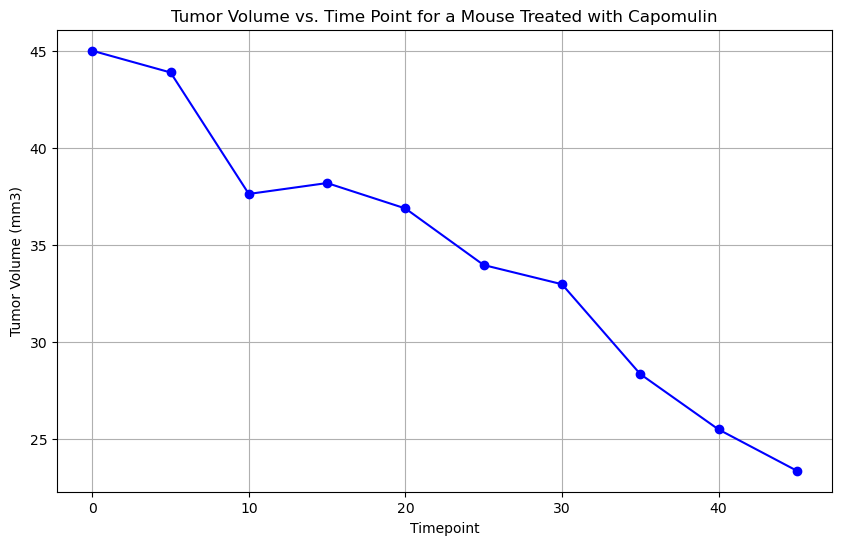

In [65]:
# Step 2: Generate line plot for single mouse
plt.figure(figsize=(10, 6))
plt.plot(single_mouse_data['Timepoint'], single_mouse_data['Tumor Volume (mm3)'], marker='o', color='b', linestyle='-')
plt.title('Tumor Volume vs. Time Point for a Mouse Treated with Capomulin')
plt.xlabel('Timepoint')
plt.ylabel('Tumor Volume (mm3)')
plt.grid(True)
plt.show()

In [66]:
# Generate a scatter plot of mouse weight vs. the average observed tumor volume for the entire Capomulin regimen


# Filter the DataFrame for mice treated with Capomulin
capomulin_df = cleaned_df[cleaned_df['Drug Regimen'] == 'Capomulin']

In [67]:
# Calculate the average tumor volume for each mouse
average_tumor_volume_per_mouse = capomulin_df.groupby('Mouse ID')['Tumor Volume (mm3)'].mean()

In [68]:
# Calculate the average tumor volume across all mice for each weight
average_weight_per_mouse = capomulin_df.groupby('Mouse ID')['Weight (g)'].mean()


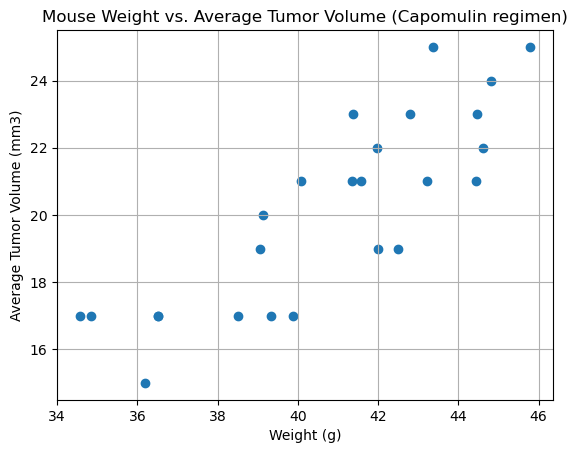

In [69]:
# Generate scatter plot

plt.scatter(average_tumor_volume_per_mouse, average_weight_per_mouse)
plt.title('Mouse Weight vs. Average Tumor Volume (Capomulin regimen)')
plt.xlabel('Weight (g)')
plt.ylabel('Average Tumor Volume (mm3)')
plt.grid(True)
plt.show()

## Correlation and Regression

The corelation between mouse weight and tumor is 0.8419363424694721


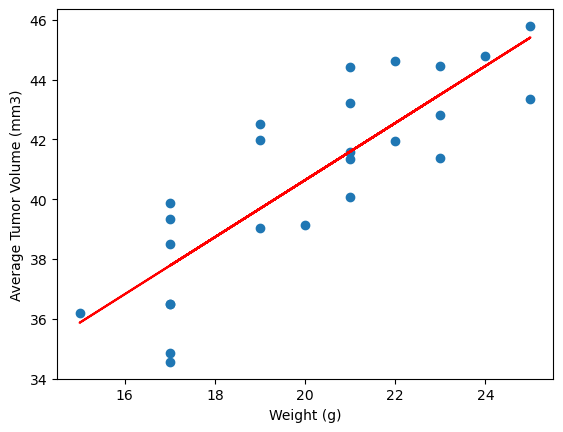

In [73]:
# Calculate the correlation coefficient and a linear regression model for mouse weight and average observed tumor volume for the entire Capomulin regimen

x = average_weight_per_mouse.values
y = average_tumor_volume_per_mouse.values

slope = st.linregress(x,y)[0] 
b = st.linregress(x,y)[1]
r = st.linregress(x,y)[2]

y_pred = slope * x + b

print(f"The corelation between mouse weight and tumor is {r}")
plt.scatter(x,y)
plt.plot(x, y_pred, color='red')
plt.xlabel('Weight (g)')
plt.ylabel('Average Tumor Volume (mm3)')
plt.show()
